# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score


# Assigning path for dataset

In [2]:
data_dir = '/home/syam/Desktop/sarath/AI case study projects/archive'
train_path = data_dir+'/Train'
test_path = data_dir+'/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT,IMG_WIDTH,channels = 30,30,3


# Total number of classes

In [3]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

# Class names

In [4]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

# Preprocessing data

In [5]:
def image_preprocess(dataset):
    """
    INPUT :
    dataset : Input data
    ____________________________________________
    OUTPUT:
    image_data   : preprocessed target data
    image_labels : preprocessed label data
    _____________________________________________
    """
    image_data = []
    image_labels = []
    for i in range(NUM_CATEGORIES):
        path = data_dir + '/'+str(dataset)+'/' + str(i)
        images = os.listdir(path)

        for img in images:
            try:
                image = cv2.imread(path + '/' + img)
                image_fromarray = Image.fromarray(image, 'RGB')
                resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
                image_data.append(np.array(resize_image))
                image_labels.append(i)
            except:
                print("Error in " + img)
    return image_data,image_labels


In [6]:
image,label=image_preprocess("Train")
image = np.array(image)
label = np.array(label)
print(image.shape, label.shape)

(39209, 30, 30, 3) (39209,)


# Splitting dataset into train and validation set

In [7]:
X_train, X_val, y_train, y_val = train_test_split(image, label, test_size=0.3, random_state=42, shuffle=True)

# Normalisation
X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


# One hot encoding of labels

In [8]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


# Model architecture

In [10]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)        

# Compiling the model

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

# Data Augmentation

In [12]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

# Train the model

In [11]:
history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
858/858 [==============================] - 62s 70ms/step - loss: 1.1220 - accuracy: 0.7040 - val_loss: 0.1469 - val_accuracy: 0.9528
Epoch 2/10
858/858 [==============================] - 60s 70ms/step - loss: 0.1756 - accuracy: 0.9460 - val_loss: 0.0716 - val_accuracy: 0.9767
Epoch 3/10
858/858 [==============================] - 61s 71ms/step - loss: 0.1133 - accuracy: 0.9659 - val_loss: 0.0356 - val_accuracy: 0.9899
Epoch 4/10
858/858 [==============================] - 60s 69ms/step - loss: 0.0845 - accuracy: 0.9742 - val_loss: 0.0232 - val_accuracy: 0.9919
Epoch 5/10
858/858 [==============================] - 61s 71ms/step - loss: 0.0750 - accuracy: 0.9773 - val_loss: 0.0589 - val_accuracy: 0.9816
Epoch 6/10
858/858 [==============================] - 60s 70ms/step - loss: 0.0767 - accuracy: 0.9767 - val_loss: 0.0230 - val_accuracy: 0.9935
Epoch 7/10
858/858 [==============================] - 60s 70ms/step - loss: 0.0632 - accuracy: 0.9815 - val_loss: 0.0169 - val_accuracy:

# Save the model

In [12]:
model.save('classifier_model.h5')

# Visualising accuracy and loss

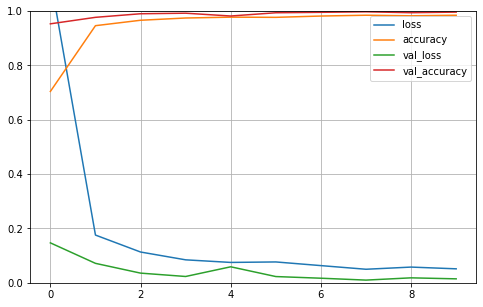

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Testing the model

In [14]:
# loading test data
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values       # ClassId of test data
imgs = test["Path"].values            # Path of test data

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')                       #convert numpy array to an image  
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))        # resize the image
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)

X_test = np.array(data)     # converting to numpy array
X_test = X_test/255         # Normalisation

# Prediction using test data
pred = model.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

/home/syam/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Test Data accuracy:  97.30007917656374


# Displaying the prediction

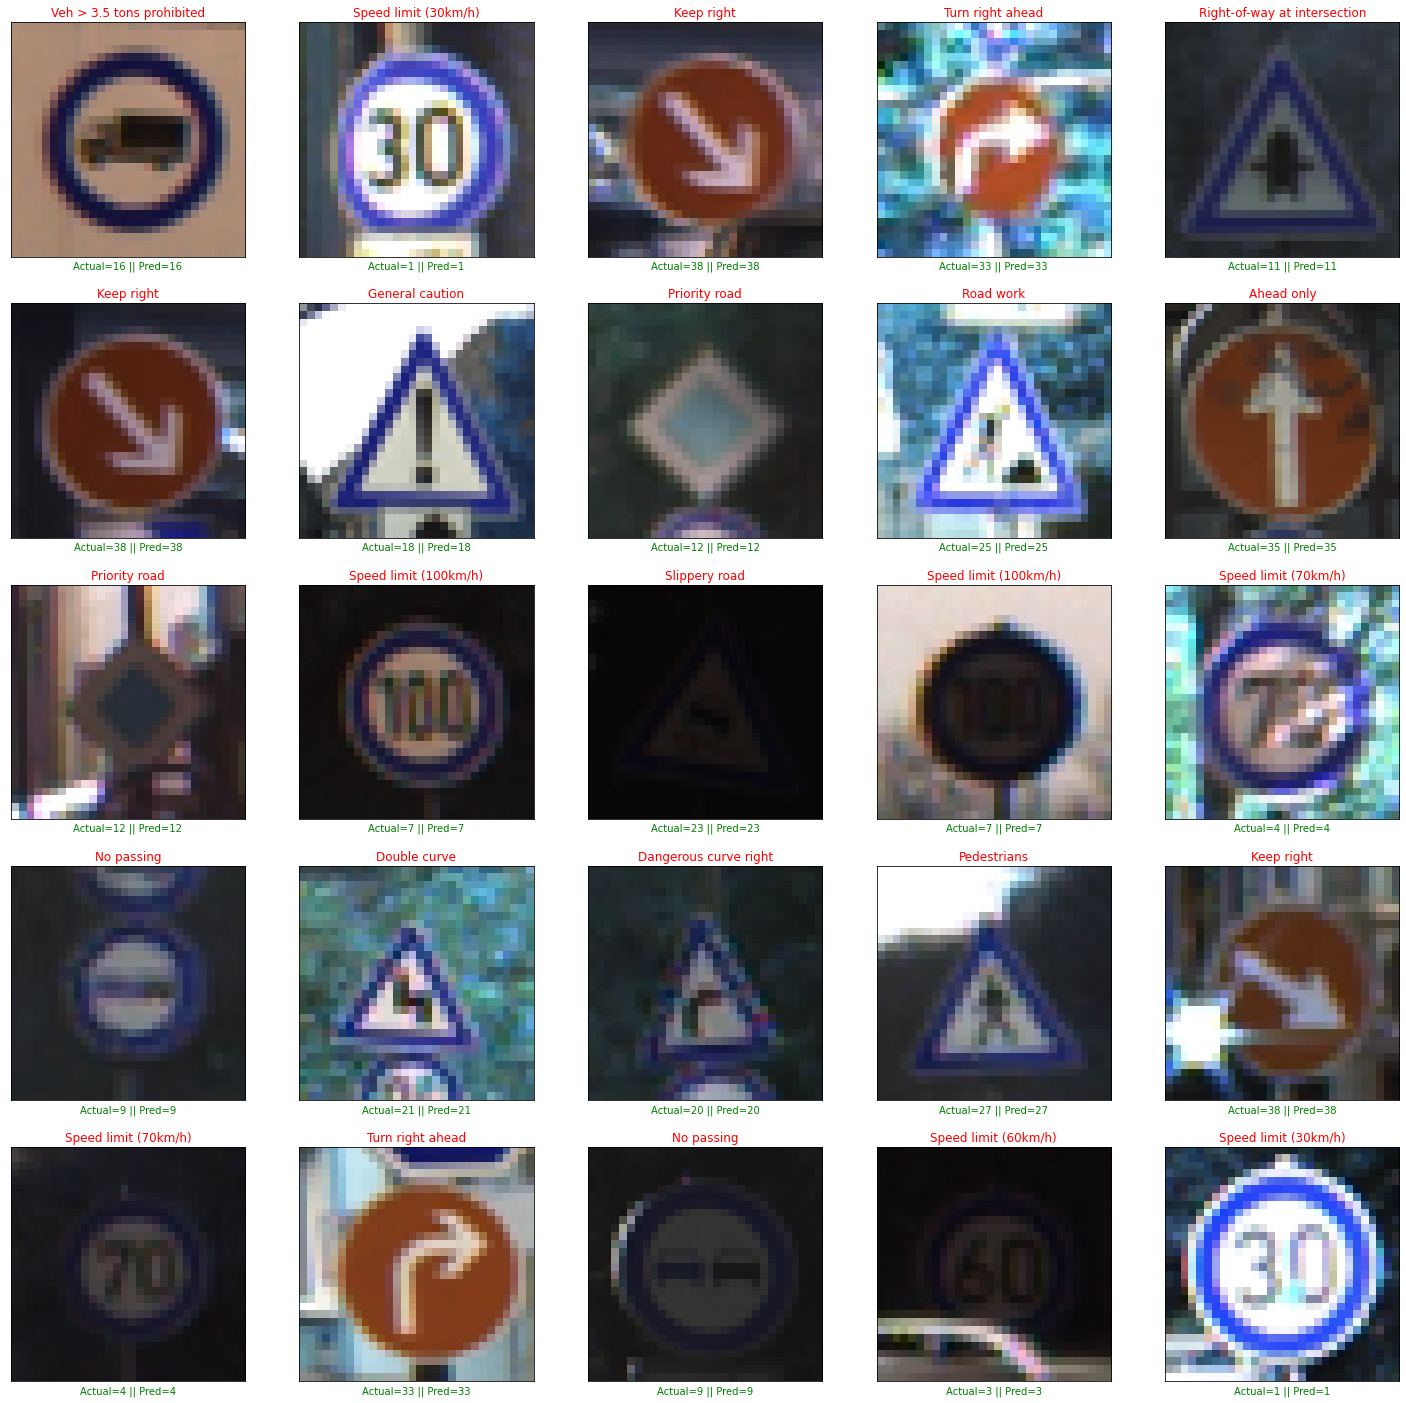

In [16]:
plt.figure(figsize = (25, 25))       # Size of image  for display

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    label =classes[actual]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.title(label,color='red')               #print title
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)  #print pred & actual class values
    plt.imshow(X_test[start_index + i])        # display the image
plt.show()